# Mid Bootcamp Classification Project

## Importing Libraries

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSV

In [522]:
df = pd.read_excel('creditcardmarketing.xlsx')

## EDA

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [524]:
df['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

### Normalising column header names

In [525]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [526]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer-type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

### next

In [527]:
df.head()

,customer_number,offer_accepted,reward,mailer-type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer-type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

In [529]:
df.head()

,customer_number,offer_accepted,reward,mailer-type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Filling nulls with average

In [530]:
df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Looking for multicolinearity

In [531]:
# think about chi squared test

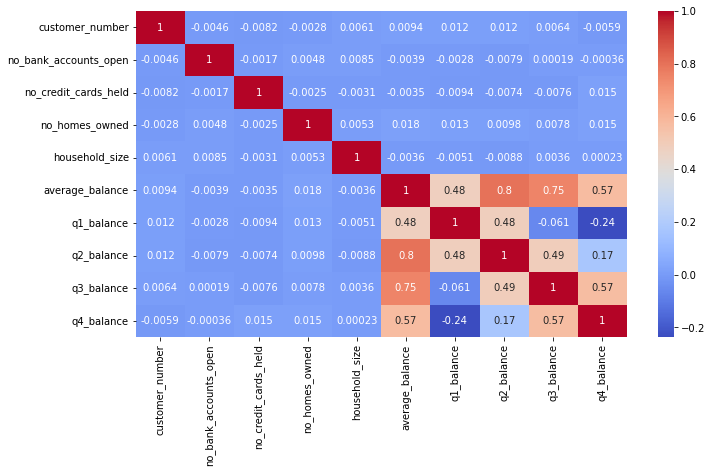

In [532]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm');

### Dropping customer_number

In [533]:
df.drop('customer_number', axis=1, inplace=True)

### Looking at chi-squared

In [534]:
df.head()

,offer_accepted,reward,mailer-type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [535]:
from scipy.stats import chi2_contingency

In [536]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_rating'>

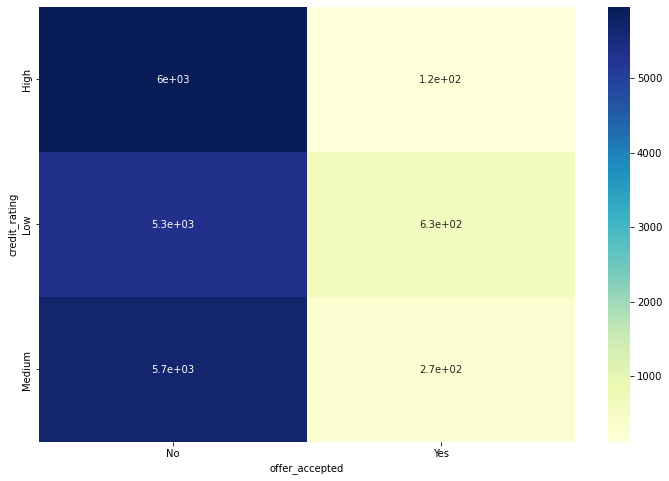

In [537]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [538]:
for x in df.select_dtypes(include='object').columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value of',x, 'is', chi2_contingency(contingency, correction=False)[0])

chi_squared p-value of offer_accepted is 18000.0
chi_squared p-value of reward is 101.99764699462307
chi_squared p-value of mailer-type is 171.13002056177373
chi_squared p-value of income_level is 114.36759816901265
chi_squared p-value of overdraft_protection is 0.1443392833541908
chi_squared p-value of credit_rating is 443.1289291631659
chi_squared p-value of own_your_home is 0.0016758285818582156


## Kofi's First Idea

### Removing unhelpful data

In [539]:
cat_useful = df[['overdraft_protection', 'own_your_home' ]]
X_useful = df.select_dtypes(include=np.number).drop('average_balance', axis=1)
y_useful = df['offer_accepted']

In [540]:
categorical_useful = pd.get_dummies(cat_useful, drop_first=True)

In [541]:
from sklearn.preprocessing import StandardScaler

In [542]:
scaler = StandardScaler()
scaler.fit(X_useful)
x_scaled = scaler.transform(X_useful)
x_useful = pd.DataFrame(x_scaled, columns = X_useful.columns)

In [543]:
x_full_useful = pd.concat([x_useful, categorical_useful], axis=1)

In [544]:
x_full_useful

,no_bank_accounts_open,no_credit_cards_held,no_homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance,overdraft_protection_Yes,own_your_home_Yes
0,-0.541343,0.121081,-0.476084,0.449620,1.224165,-0.267767,0.095768,0.343376,0,0
1,-0.541343,0.121081,1.864032,1.347164,-1.406368,-1.954545,-1.743065,-0.795158,0,1
2,1.575115,0.121081,-0.476084,-1.345469,-0.877034,-1.416351,-1.621922,-1.017137,0,1
3,1.575115,-1.133645,-0.476084,0.449620,1.077307,1.664042,0.139163,-0.700280,0,0
4,-0.541343,0.121081,-0.476084,2.244709,1.984276,0.782367,-0.108546,-0.796948,0,1
...,...,...,...,...,...,...,...,...,...,...
17995,-0.541343,-1.133645,-0.476084,1.347164,-1.249827,-2.044244,-1.755722,-0.737874,0,1
17996,-0.541343,1.375807,-0.476084,-0.447925,0.118696,-0.129937,-0.179062,-0.492623,0,1
17997,-0.541343,0.121081,-0.476084,0.449620,0.012183,-0.508423,0.231375,1.224129,0,0
17998,-0.541343,2.630533,1.864032,-1.345469,-0.459053,-0.035862,-0.320094,1.440737,0,1


In [545]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [590]:
X_train, X_test, y_train, y_test = train_test_split(df[['household_size', 'no_homes_owned']], y_useful, test_size=0.3, random_state=100)

In [591]:
lr = LogisticRegression(max_iter = 400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [592]:
y_pred = lr.predict(X_test)


In [593]:
accuracy_score(y_test ,y_pred)

0.9472222222222222

In [550]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


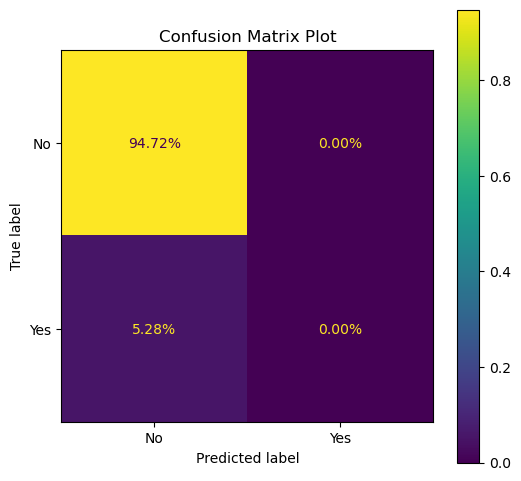

In [551]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Modelling

### Splitting in numerical and categorical

In [552]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Looking for outliers

In [553]:
# consider whether to deal with outliers

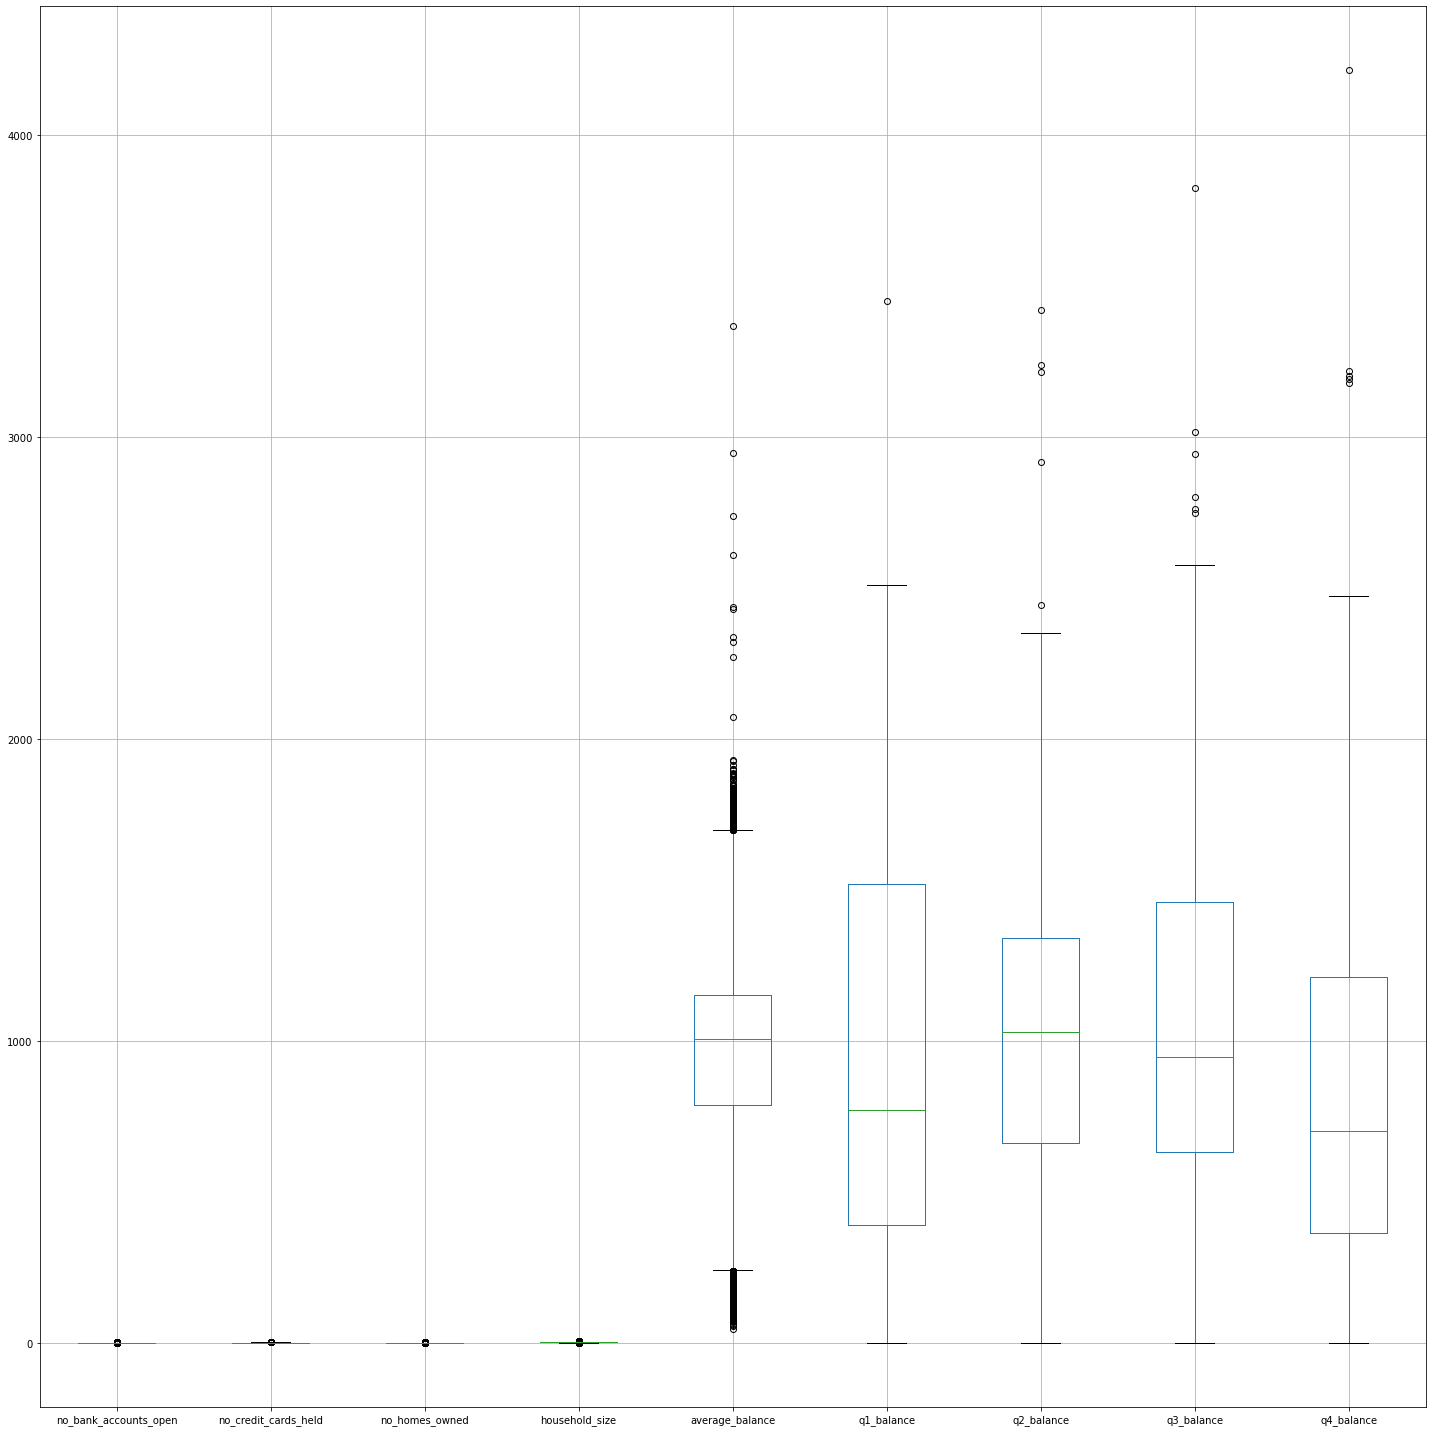

In [554]:
plt.figure(figsize=(20, 20))
X.boxplot()
plt.tight_layout()

### scaling numerical data

In [555]:
#sns.pairplot(X)

In [556]:
from sklearn.preprocessing import StandardScaler

In [557]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [558]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [559]:
categorical = pd.get_dummies(cat, drop_first=True)

In [560]:
categorical

,reward_Cash Back,reward_Points,mailer-type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


### Concatenating data

In [561]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1

### Imports

In [562]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [563]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [564]:
lr = LogisticRegression(max_iter = 400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [565]:
y_pred = lr.predict(X_test)


In [566]:
accuracy_score(y_test ,y_pred)


0.9472222222222222

In [567]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


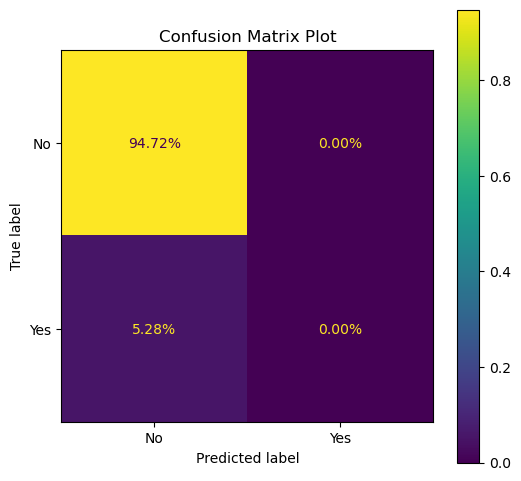

In [568]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 2
### Using SMOTE to fix imbalance in data

In [569]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [570]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [571]:
len(X_train_sm), len(y_train_sm)

(23724, 23724)

In [572]:
y_train_sm.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [573]:
lr.fit(X_train_sm, y_train_sm)
y_pred_sm = lr.predict(X_test)

In [574]:
accuracy_score(y_test ,y_pred_sm)

0.6844444444444444

In [575]:
pd.DataFrame(classification_report(y_test, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.964082,0.088696,0.684444,0.526389,0.917881
recall,0.692669,0.536842,0.684444,0.614755,0.684444
f1-score,0.806143,0.152239,0.684444,0.479191,0.771632
support,5115.000000,285.000000,0.684444,5400.000000,5400.000000


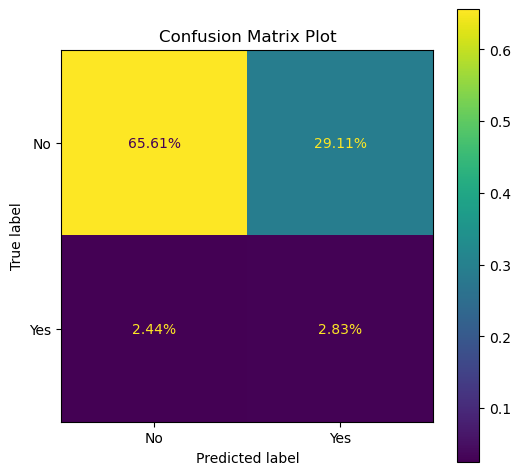

In [576]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## TOMEK LINKS

In [577]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [578]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [579]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [580]:
len(X_train_tk), len(y_train_tk)

(12271, 12271)

In [581]:
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [582]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

NameError: name 'tk' is not defined

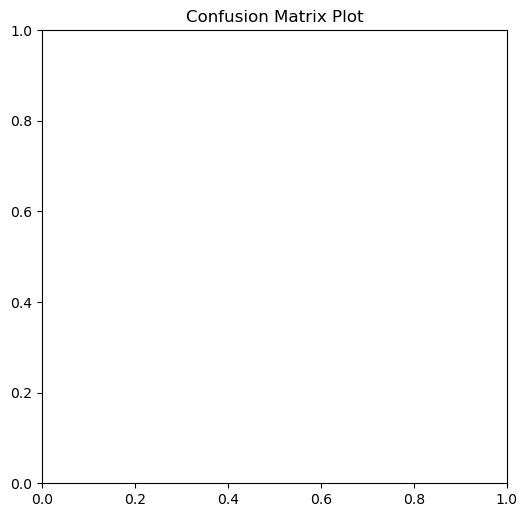

In [583]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(tk, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 2.5
### Using Smote and Tomek together

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_sm_tk, y_train_sm_tk = tomek.fit_resample(X_train_sm, y_train_sm)

In [ ]:
len(X_train_sm_tk), len(y_train_sm_tk)

(23660, 23660)

In [ ]:
lr.fit(X_train_sm_tk, y_train_sm_tk)
y_pred_sm_tk = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_sm_tk)

0.682962962962963

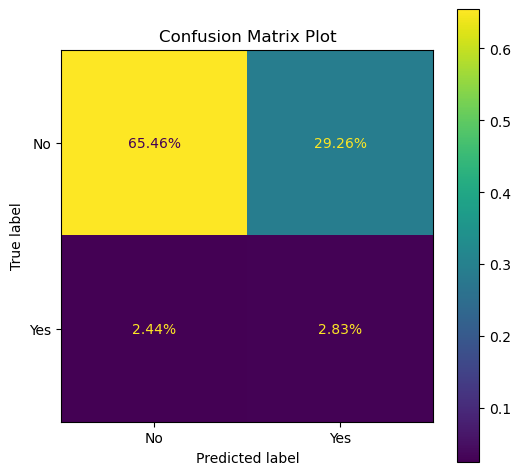

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 3
### Dropping average balance column

In [ ]:
x_full_3 = x_full.drop('average_balance', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full_3, y, test_size=0.3, random_state=100)

In [ ]:
lr = LogisticRegression(max_iter = 400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
accuracy_score(y_test ,y_pred)


0.9472222222222222

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


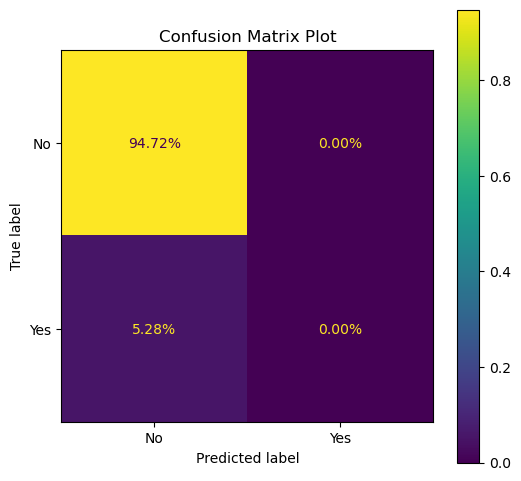

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 4
### K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, p=2)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred)


0.9461111111111111

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947828,0.285714,0.946111,0.616771,0.912883
recall,0.998045,0.014035,0.946111,0.506040,0.946111
f1-score,0.972288,0.026756,0.946111,0.499522,0.922385
support,5115.000000,285.000000,0.946111,5400.000000,5400.000000


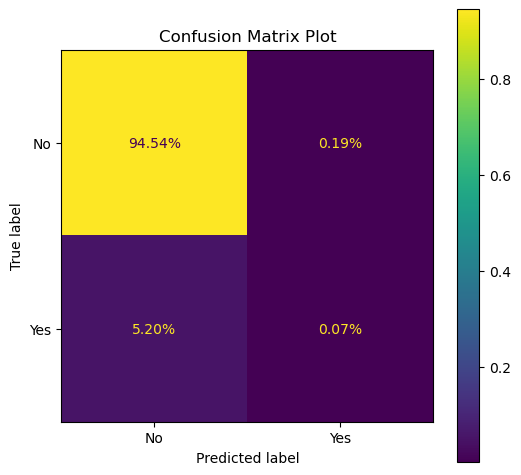

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 5
### K Nearest Neighbours with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, p=2)
kn.fit(X_train_sm, y_train_sm)
y_pred = kn.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred)


0.7103703703703703

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.956309,0.076209,0.71037,0.516259,0.909860
recall,0.727468,0.403509,0.71037,0.565489,0.710370
f1-score,0.826338,0.128205,0.71037,0.477272,0.789492
support,5115.000000,285.000000,0.71037,5400.000000,5400.000000


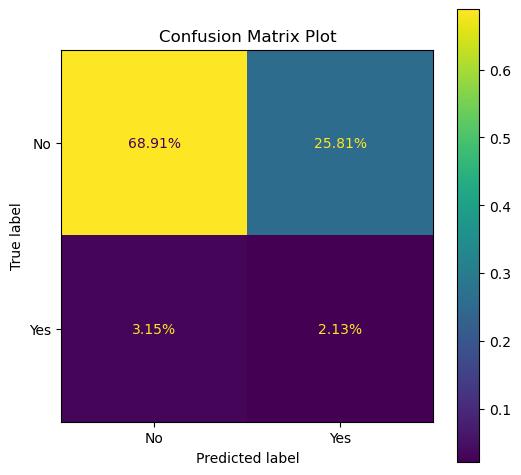

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Model Candidate 6
### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
rf=RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred)

0.947037037037037

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947212,0.0,0.947037,0.473606,0.897221
recall,0.999804,0.0,0.947037,0.499902,0.947037
f1-score,0.972798,0.0,0.947037,0.486399,0.921456
support,5115.000000,285.0,0.947037,5400.000000,5400.000000


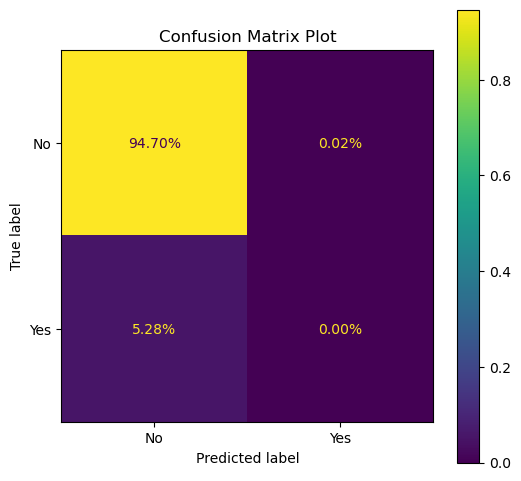

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## Candidate Model 7
### Random Forest with Smote

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
len(X_train_sm),len(y_train_sm)

(23724, 23724)

In [ ]:
rf=RandomForestClassifier(n_estimators=1000)

rf.fit(X_train_sm,y_train_sm)

y_pred=rf.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred)

0.9153703703703704

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.949614,0.109091,0.91537,0.529352,0.905253
recall,0.961681,0.084211,0.91537,0.522946,0.915370
f1-score,0.955610,0.095050,0.91537,0.525330,0.910191
support,5115.000000,285.000000,0.91537,5400.000000,5400.000000


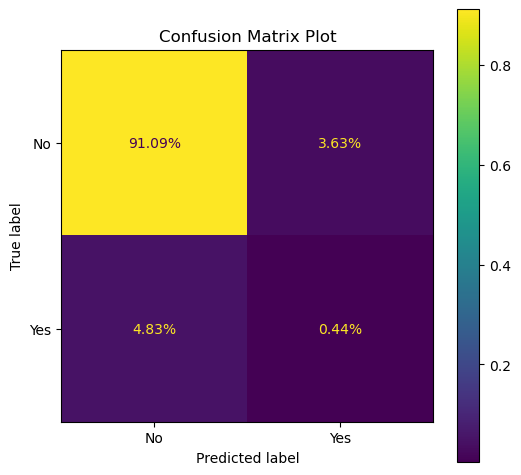

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

## trying min_max scaler - makes no difference

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
xmm_scaled = scaler.transform(X)
x_mm = pd.DataFrame(xmm_scaled, columns = X.columns)


In [ ]:
x_full_mm = pd.concat([x, categorical], axis=1)

### standard model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full_mm, y, test_size=0.3, random_state=100)

In [ ]:
lr = LogisticRegression(max_iter = 400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
accuracy_score(y_test ,y_pred)


0.9472222222222222

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


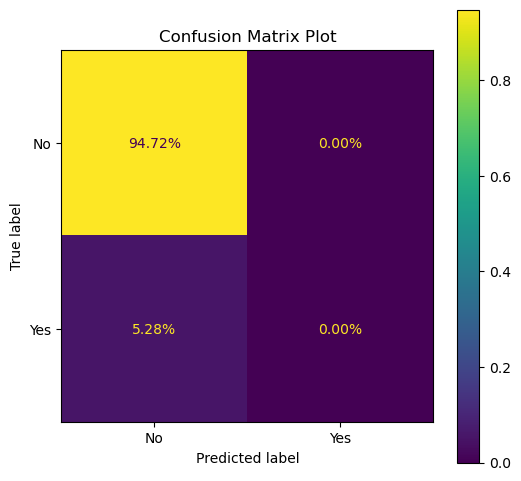

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');